In [1]:
# Dependencies
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from citipy import citipy
from random import uniform
from config import api_key

In [2]:
# Select 500 unique cities
cities_df = pd.DataFrame(columns=("city","country","lat","lng","temp","humidity","cloudiness","wind_speed"))
def getCoordinates(quadrant):
    if quadrant == 1:
        x = uniform(0,90)
        y = uniform(0,-180)
        return x,y
    if quadrant == 2:
        x = uniform(0,90)
        y = uniform(0,180)
        return x,y
    if quadrant == 3:
        x = uniform(0,-90)
        y = uniform(0,180)
        return x,y
    x = uniform(0,-90)
    y = uniform(0,-180)
    return x,y

# Based on quadrant, generate a full range of cities, lng and lat
sample_size_lim = 500
sample_size = len(cities_df)
while sample_size < sample_size_lim:
    quadrant = (sample_size % 4) + 1
    point = (getCoordinates(quadrant))
    city = citipy.nearest_city(point[0], point[1])
    if not ((cities_df['city'] == city.city_name) & (cities_df['country'] == city.country_code)).any():
        #print(f"city: {city.city_name} country: {city.country_code}, coordinates: {point}")
        cities_df.loc[sample_size] = [city.city_name, city.country_code, point[0], point[1],'','','','']
    sample_size = len(cities_df)
cities_df.head(10)

,city,country,lat,lng,temp,humidity,cloudiness,wind_speed
0,higuey,do,19.095516,-68.270563,,,,
1,surgana,in,20.478906,73.723447,,,,
2,kaliua,tz,-5.648867,31.699318,,,,
3,puerto suarez,bo,-18.955555,-58.634200,,,,
4,port hardy,ca,50.499509,-126.359121,,,,
5,wattegama,lk,3.505686,86.724530,,,,
6,kaitangata,nz,-50.967932,170.838705,,,,
7,punta arenas,cl,-56.770367,-76.068056,,,,
8,nipawin,ca,52.935448,-103.573868,,,,
9,goure,ne,15.985963,11.363595,,,,


In [3]:
owm_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

for idx, row in cities_df.iterrows():
    print("Now retrieving weather for city: %s, #%s" % ( idx, row['city']))
    query_url = owm_url + "appid=" + api_key + "&lat=" + str(row["lat"]) + "&lon=" + str(row["lng"]) + "&units=imperial&mode=json"
    print(query_url)
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        cities_df.set_value(idx,'temp',weather_json["main"]["temp"])
        cities_df.set_value(idx,'humidity',weather_json["main"]["humidity"])
        cities_df.set_value(idx,'cloudiness',weather_json["clouds"]["all"])
        cities_df.set_value(idx,'wind_speed',weather_json["wind"]["speed"])
    except:
        print("skipping city %s" % (row['city']))
cities_df.head(10)

Now retrieving weather for city: 0, #higuey
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=19.095516123565233&lon=-68.27056301954963&units=imperial&mode=json
Now retrieving weather for city: 1, #surgana
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=20.478906466901783&lon=73.72344731973038&units=imperial&mode=json
Now retrieving weather for city: 2, #kaliua
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-5.648866987271186&lon=31.699318059479026&units=imperial&mode=json
Now retrieving weather for city: 3, #puerto suarez
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-18.95555535281808&lon=-58.63420017942009&units=imperial&mode=json
Now retrieving weather for city: 4, #port hardy
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=50.499509125072784&lon=-126.35912101833604&units=im

Now retrieving weather for city: 41, #khani
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=59.1104633052707&lon=121.57053028621853&units=imperial&mode=json
Now retrieving weather for city: 42, #yulara
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-23.218211819381253&lon=127.2638324474025&units=imperial&mode=json
Now retrieving weather for city: 43, #saldanha
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-42.446075690999486&lon=-6.640618845530595&units=imperial&mode=json
Now retrieving weather for city: 44, #ketchikan
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=48.21795793577325&lon=-137.012848214349&units=imperial&mode=json
Now retrieving weather for city: 45, #katsuura
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=19.751211165030398&lon=150.91096952839976&units=imperi

Now retrieving weather for city: 82, #port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-85.66873864638187&lon=37.351280313222425&units=imperial&mode=json
Now retrieving weather for city: 83, #avarua
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-41.24645802970361&lon=-163.3306195599091&units=imperial&mode=json
Now retrieving weather for city: 84, #hilo
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=12.913916436321633&lon=-149.26195837924095&units=imperial&mode=json
Now retrieving weather for city: 85, #chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=79.72229641175302&lon=152.34940665039485&units=imperial&mode=json
Now retrieving weather for city: 86, #richards bay
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-28.964594776311632&lon=32.36472448989221

Now retrieving weather for city: 122, #bambanglipuro
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-16.247677944794066&lon=109.39639992094523&units=imperial&mode=json
Now retrieving weather for city: 123, #cape town
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-65.6513575514952&lon=-4.281985914264856&units=imperial&mode=json
Now retrieving weather for city: 124, #lagos
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=35.5353389594988&lon=-9.558492641581894&units=imperial&mode=json
Now retrieving weather for city: 125, #hami
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=40.791884117059354&lon=95.04502172391548&units=imperial&mode=json
Now retrieving weather for city: 126, #alice springs
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-26.33711008085322&lon=136.27906896559014

Now retrieving weather for city: 162, #souillac
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-37.07599510911398&lon=67.32608846589206&units=imperial&mode=json
Now retrieving weather for city: 163, #fare
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-8.980444784331523&lon=-148.588956944773&units=imperial&mode=json
Now retrieving weather for city: 164, #paamiut
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=61.371954875575206&lon=-52.27109775409311&units=imperial&mode=json
Now retrieving weather for city: 165, #kavaratti
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=8.964764868392015&lon=70.09806992439175&units=imperial&mode=json
Now retrieving weather for city: 166, #grand gaube
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-15.197095391763156&lon=66.00231507210212&units

Now retrieving weather for city: 202, #tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-52.21389522646487&lon=161.70541889699973&units=imperial&mode=json
Now retrieving weather for city: 203, #sao francisco de assis
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-29.685545839257642&lon=-54.988323754962686&units=imperial&mode=json
Now retrieving weather for city: 204, #attawapiskat
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=53.07866108014476&lon=-83.58006175613752&units=imperial&mode=json
Now retrieving weather for city: 205, #airai
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=12.830388388016127&lon=142.58724831589936&units=imperial&mode=json
Now retrieving weather for city: 206, #poum
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-17.443217662891115&lon=163.2

Now retrieving weather for city: 242, #kununurra
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-13.423875640117203&lon=125.87869724690363&units=imperial&mode=json
Now retrieving weather for city: 243, #matucana
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-11.931117441515507&lon=-76.29363220513304&units=imperial&mode=json
Now retrieving weather for city: 244, #san patricio
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=9.279510947524697&lon=-114.02517722027925&units=imperial&mode=json
Now retrieving weather for city: 245, #kargopol
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=61.04745958626452&lon=38.882428515954345&units=imperial&mode=json
Now retrieving weather for city: 246, #boyolangu
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-15.83220360906453&lon=110.60530271

Now retrieving weather for city: 282, #kipushi
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-11.655752232722048&lon=26.963204420291895&units=imperial&mode=json
Now retrieving weather for city: 283, #avera
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-26.4837412465939&lon=-153.57017515705707&units=imperial&mode=json
Now retrieving weather for city: 284, #cervo
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=45.87307532774752&lon=-6.819969525738041&units=imperial&mode=json
Now retrieving weather for city: 285, #zhigansk
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=68.15531637155112&lon=119.00933178765763&units=imperial&mode=json
Now retrieving weather for city: 286, #isangel
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-17.163204939908603&lon=176.3477328289933&units=imp

Now retrieving weather for city: 322, #bambous virieux
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-33.068730048366206&lon=82.78728053264199&units=imperial&mode=json
Now retrieving weather for city: 323, #regente feijo
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-22.288205492150745&lon=-51.26929985972234&units=imperial&mode=json
Now retrieving weather for city: 324, #makakilo city
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=13.371537772225636&lon=-161.56859927713094&units=imperial&mode=json
Now retrieving weather for city: 325, #verkh-usugli
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=53.0396082632862&lon=115.98523573284407&units=imperial&mode=json
Now retrieving weather for city: 326, #broken hill
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-30.08721332245588

Now retrieving weather for city: 362, #usakos
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-21.31508605919747&lon=15.012716012241643&units=imperial&mode=json
Now retrieving weather for city: 363, #yurimaguas
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-5.814410643799444&lon=-76.49681656708245&units=imperial&mode=json
Now retrieving weather for city: 364, #qasigiannguit
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=68.05332524884467&lon=-48.107294389615355&units=imperial&mode=json
Now retrieving weather for city: 365, #hasaki
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=31.220030346601533&lon=146.47393649243395&units=imperial&mode=json
Now retrieving weather for city: 366, #mocambique
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-16.535313753799592&lon=42.3873838572

Now retrieving weather for city: 402, #majenang
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-7.3252018299880985&lon=108.80765886074083&units=imperial&mode=json
Now retrieving weather for city: 403, #trelew
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-42.44522968111925&lon=-67.11067361687886&units=imperial&mode=json
Now retrieving weather for city: 404, #pacific grove
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=28.582116195578255&lon=-134.73109192374673&units=imperial&mode=json
Now retrieving weather for city: 405, #mehamn
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=82.87599728157943&lon=28.95515269474621&units=imperial&mode=json
Now retrieving weather for city: 406, #de aar
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-30.119343599711506&lon=23.836195646333874&

Now retrieving weather for city: 442, #port augusta
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-28.922089078217788&lon=138.41861945404722&units=imperial&mode=json
Now retrieving weather for city: 443, #amarante do maranhao
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-5.0319581695989495&lon=-46.7627155866613&units=imperial&mode=json
Now retrieving weather for city: 444, #forestville
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=51.688298676669696&lon=-70.34747310871224&units=imperial&mode=json
Now retrieving weather for city: 445, #khatanga
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=69.9585459250616&lon=96.96950003563762&units=imperial&mode=json
Now retrieving weather for city: 446, #angoche
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-19.325163071374305&lon=40

Now retrieving weather for city: 482, #pringsewu
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-6.446835018731623&lon=102.691826420382&units=imperial&mode=json
Now retrieving weather for city: 483, #carauari
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-4.81195178774634&lon=-67.49452790199162&units=imperial&mode=json
Now retrieving weather for city: 484, #san quintin
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=24.587329012789375&lon=-122.29022058807158&units=imperial&mode=json
Now retrieving weather for city: 485, #alugan
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=16.497587631072182&lon=130.66766498545775&units=imperial&mode=json
Now retrieving weather for city: 486, #lukulu
http://api.openweathermap.org/data/2.5/weather?appid=cf4f88d2aac4e1b0320ac8a830d6def9&lat=-14.173850945268923&lon=23.30558100718366&un

,city,country,lat,lng,temp,humidity,cloudiness,wind_speed
0,higuey,do,19.095516,-68.270563,82.4,65,20,11.41
1,surgana,in,20.478906,73.723447,76.05,38,92,2.48
2,kaliua,tz,-5.648867,31.699318,67.23,91,8,1.92
3,puerto suarez,bo,-18.955555,-58.634200,93.42,65,8,11.88
4,port hardy,ca,50.499509,-126.359121,38.7,94,36,1.7
5,wattegama,lk,3.505686,86.724530,85.5,99,88,13.22
6,kaitangata,nz,-50.967932,170.838705,51.66,96,88,19.82
7,punta arenas,cl,-56.770367,-76.068056,42.3,100,76,26.31
8,nipawin,ca,52.935448,-103.573868,28.4,86,90,3.36
9,goure,ne,15.985963,11.363595,80.91,9,0,3.38


In [4]:
chart_date = datetime.now().strftime('%m/%d/%Y')
chart_date

'03/17/2018'

In [5]:
# Prep work for chart
axis_lat = []
axis_temp = []
axis_humd = []
axis_cloud = []
axis_wind = []

for idx, row in cities_df.iterrows():
    axis_lat.append(float(row["lat"]))
    axis_temp.append(float(row["temp"]))
    axis_humd.append(float(row["humidity"]))
    axis_cloud.append(float(row["cloudiness"]))
    axis_wind.append(float(row["wind_speed"]))

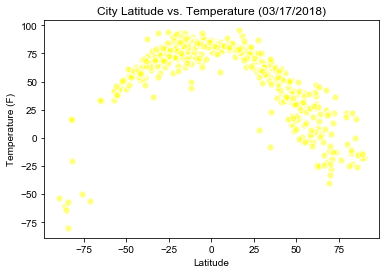

In [6]:
#Latitude vs Temp Plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(axis_lat, axis_temp, marker="o",color="yellow",s=50, linewidths=2,edgecolor='w',alpha=0.5)
ax.set_title("City Latitude vs. Temperature (%s)" % (chart_date))
ax.set_xlabel("Latitude")
ax.set_ylabel("Temperature (F)")
sns.set()
plt.savefig('lat_temp.png')
plt.show()

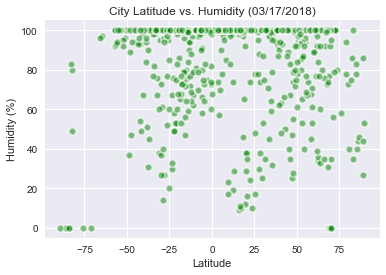

In [7]:
#Latitude vs Humidity Plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(axis_lat,axis_humd, marker="o",color="green",s=50, linewidths=2,edgecolor='w',alpha=0.5)
ax.set_title("City Latitude vs. Humidity (%s)" % (chart_date))
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
sns.set()
plt.savefig('lat_humidity.png')
plt.show()

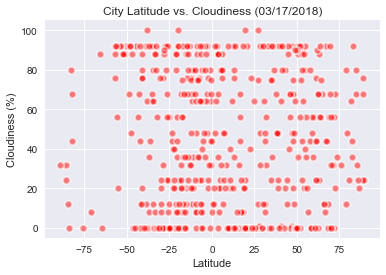

In [8]:
#Latitude vs Cloudness Plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(axis_lat, axis_cloud, marker="o",color="red",s=50, linewidths=2,edgecolor='w',alpha=0.5)
ax.set_title("City Latitude vs. Cloudiness (%s)" % (chart_date))
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
sns.set()
plt.savefig('lat_cloud.png')
plt.show()

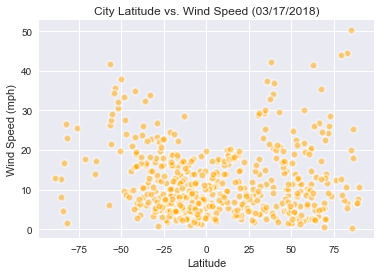

In [9]:
#Latitude vs Wind Speed Plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter( axis_lat,axis_wind,marker="o",color="orange",s=50, linewidths=2,edgecolor='w',alpha=0.5)
ax.set_title("City Latitude vs. Wind Speed (%s)" % (chart_date))
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
sns.set()
plt.savefig('lat_wind.png')
plt.show()

In [10]:
#Output Results
cities_df.to_csv('weather_cities.csv')